$\Large\textbf{Welcome to IE 684 (Spring 2021-22)}$  

$\large\textbf{Lab 1 Exercise 1. }$

We will start with a procedure which helps to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= (x_1+100)^2 + (x_2-25)^2$. 

We will use the following gradient descent type algorithm: 

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$, Steplength $\eta$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}


In [1]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [2]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray 
  assert len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return (x[0]+100)**2 + (x[1]-25)**2


In [3]:
#check whether you can pass arbitrary arguments to evalf 
#my_x = [1,3] #Note: my_x is a list of 2 elements, but not a numpy array
#print('f(my_x) is:',evalf(my_x))

In [4]:
# First we will create a numpy array of size 2
my_x = np.array([1,2])
print('type of my_x',type(my_x), 'length of my_x:',len(my_x)) #verify if my_x is indeed a numpy array of size 2


type of my_x <class 'numpy.ndarray'> length of my_x: 2


In [5]:
#now call evalf (x) with my_x as argument and check if it works
#print(evalf(my_x))

In [6]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]+100),2*(x[1]-25)])

In [7]:
def find_minimizer(start_x, tol, step_length):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  assert type(step_length) is float and step_length>=0 
  x = start_x
  g_x = evalg(x)
  k = 0

  #we can manage a list to store the function values, might be useful for plotting 
  fvals = [evalf(x)]
  print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #append the current function value to the list containing function values
    fvals.append(evalf(x))
    print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x, fvals,k 


In [8]:
my_start_x = np.array([10,10])
my_steplength = 0.1
my_tol= 1e-3 #10^{-3} or 0.001
opt_x, fvals_ret,total_iteration = find_minimizer(my_start_x, my_tol, my_steplength)
print('Optimizer:',opt_x)
print(f"total iterations= {total_iteration}")

iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-12.  13.]  f(x): 7888.0  grad at x: [176. -24.]  gradient norm: 177.62882648939615
iter: 2  x: [-29.6  15.4]  f(x): 5048.320000000001  grad at x: [140.8 -19.2]  gradient norm: 142.10306119151693
iter: 3  x: [-43.68  17.32]  f(x): 3230.9247999999993  grad at x: [112.64 -15.36]  gradient norm: 113.68244895321352
iter: 4  x: [-54.944  18.856]  f(x): 2067.791872  grad at x: [ 90.112 -12.288]  gradient norm: 90.94595916257082
iter: 5  x: [-63.9552  20.0848]  f(x): 1323.3867980799996  grad at x: [72.0896 -9.8304]  gradient norm: 72.75676733005665
iter: 6  x: [-71.16416  21.06784]  f(x): 846.9675507711995  grad at x: [57.67168 -7.86432]  gradient norm: 58.20541386404531
iter: 7  x: [-76.931328  21.854272]  f(x): 542.0592324935676  grad at x: [46.137344 -6.291456]  gradient norm: 46.56433109123625
iter: 8  x: [-81.5450624  22.4834176]  f(x): 346.9179087958833  grad at x: [36.9098752 -5.03316

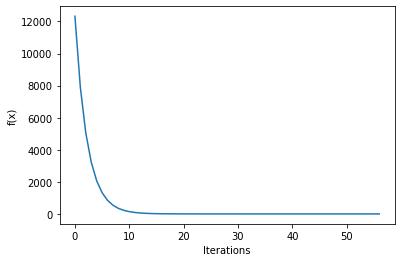

In [9]:
#we will plot the function values and check the behavior
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(fvals_ret)
plt.xlabel('Iterations')
plt.ylabel('f(x)')
plt.show()

#Que.2

In [10]:
print(f"The minimizer is {opt_x} and the minimum function value is {evalf(opt_x)}")

The minimizer is [-99.99958844  24.99994388] and the minimum function value is 1.7253033717248775e-07


#Que.3

In [11]:
list_of_tolerance=[]
for p in range(1,11):
  list_of_tolerance.append(10**(-p))

In [12]:
list_of_tolerance

[0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09, 1e-10]

In [13]:
Iterations=[]
for t in list_of_tolerance:
  my_start_x = np.array([10,10])
  my_steplength = 0.1
  my_tol= t
  print(f"For tolerance = {t}\n")
  opt_x, fvals_ret,iterations = find_minimizer(my_start_x, my_tol, my_steplength)
  print('\nOptimizer:',opt_x,)
  print(f"for tolerance value= {t}, the minimum value of function is {evalf(opt_x)} and number of iterations are= {iterations}")
  Iterations.append(iterations)

For tolerance = 0.1

iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-12.  13.]  f(x): 7888.0  grad at x: [176. -24.]  gradient norm: 177.62882648939615
iter: 2  x: [-29.6  15.4]  f(x): 5048.320000000001  grad at x: [140.8 -19.2]  gradient norm: 142.10306119151693
iter: 3  x: [-43.68  17.32]  f(x): 3230.9247999999993  grad at x: [112.64 -15.36]  gradient norm: 113.68244895321352
iter: 4  x: [-54.944  18.856]  f(x): 2067.791872  grad at x: [ 90.112 -12.288]  gradient norm: 90.94595916257082
iter: 5  x: [-63.9552  20.0848]  f(x): 1323.3867980799996  grad at x: [72.0896 -9.8304]  gradient norm: 72.75676733005665
iter: 6  x: [-71.16416  21.06784]  f(x): 846.9675507711995  grad at x: [57.67168 -7.86432]  gradient norm: 58.20541386404531
iter: 7  x: [-76.931328  21.854272]  f(x): 542.0592324935676  grad at x: [46.137344 -6.291456]  gradient norm: 46.56433109123625
iter: 8  x: [-81.5450624  22.4834176]  f(x): 346.9179087958833  grad at x:

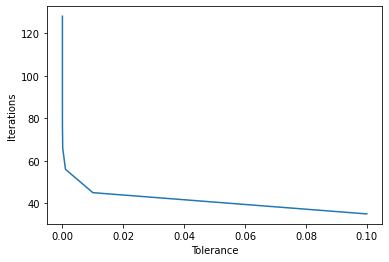

In [14]:
plt.plot(list_of_tolerance,Iterations)
plt.ylabel('Iterations')
plt.xlabel('Tolerance')
plt.show()

we observed that as we decrease the value of tolerance the number of iterations increses.and with the decrease in the tolerance value the value of optimizer approaches to $[-100,25]$ and the optimal value tends to zero.

#Que.4

In [15]:
list_of_step_length=[0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [16]:
Iterations=[]
for n in list_of_step_length:
  my_start_x = np.array([10,10])
  my_steplength = n
  my_tol= 1e-5 #1
  print(f"For step length = {n}")
  opt_x, fvals_ret,iterations= find_minimizer(my_start_x, my_tol, my_steplength)
  print('Optimizer:',opt_x,)
  print(f"for step length = {n}, the minimum value of function is {evalf(opt_x)} and number of iterations are= {iterations}\n")
  Iterations.append(iterations)

Streaming output truncated to the last 5000 lines.
iter: 4623  x: [-99.98948317  24.99856589]  f(x): 0.00011266049912664543  grad at x: [ 0.02103367 -0.00286823]  gradient norm: 0.021228330045167984
iter: 4624  x: [-99.9895042   24.99856875]  f(x): 0.00011221030777216574  grad at x: [ 0.0209916  -0.00286249]  gradient norm: 0.021185873385080517
iter: 4625  x: [-99.98952519  24.99857162]  f(x): 0.00011176191538238311  grad at x: [ 0.02094962 -0.00285677]  gradient norm: 0.021143501638317443
iter: 4626  x: [-99.98954614  24.99857447]  f(x): 0.00011131531476846489  grad at x: [ 0.02090772 -0.00285105]  gradient norm: 0.021101214635036048
iter: 4627  x: [-99.98956705  24.99857732]  f(x): 0.00011087049877065489  grad at x: [ 0.0208659  -0.00284535]  gradient norm: 0.021059012205766434
iter: 4628  x: [-99.98958791  24.99858017]  f(x): 0.0001104274602575703  grad at x: [ 0.02082417 -0.00283966]  gradient norm: 0.02101689418135518
iter: 4629  x: [-99.98960874  24.99858301]  f(x): 0.00010998619

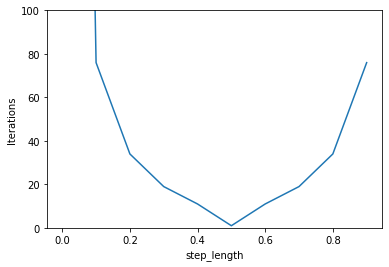

In [17]:
plt.plot(list_of_step_length,Iterations)
plt.ylabel('Iterations')
plt.xlabel('step_length')
plt.ylim([0, 100])
plt.show()

we obeserved that as we increase the value of step length from 0.0001 to 0.5 the numbers of iterations decreases but after 0.5 it again starts increasing and number of iterations is minimum (i.e. 1) at step length= 0.5

#Que.5

In [18]:
list_of_starting_points=[[10000,10000],[500,0],[0,1000],[1,1],[-500,-2]]

In [19]:
no_of_iterations=[]
final_optimizer=[]
final_minimum_value=[]
for x in list_of_starting_points:
  my_start_x = np.array(x)
  my_steplength = 0.1
  my_tol= 1e-5 
  print(f"For starting point= {x}")
  opt_x, fvals_ret,iterations= find_minimizer(my_start_x, my_tol, my_steplength)
  print('\nOptimizer:',opt_x,)
  print(f"for starting point = {x}, the minimum value of function is {evalf(opt_x)} and number of iterations are= {iterations}\n")
  no_of_iterations.append(iterations)
  final_optimizer.append(opt_x)
  final_minimum_value.append(evalf(opt_x))


For starting point= [10000, 10000]
iter: 0  x: [10000 10000]  f(x): 201510625  grad at x: [20200 19950]  gradient norm: 28390.887622615817
iter: 1  x: [7980. 8005.]  f(x): 128966800.0  grad at x: [16160. 15960.]  gradient norm: 22712.710098092655
iter: 2  x: [6364. 6409.]  f(x): 82538752.0  grad at x: [12928. 12768.]  gradient norm: 18170.168078474122
iter: 3  x: [5071.2 5132.2]  f(x): 52824801.28  grad at x: [10342.4 10214.4]  gradient norm: 14536.134462779297
iter: 4  x: [4036.96 4110.76]  f(x): 33807872.8192  grad at x: [8273.92 8171.52]  gradient norm: 11628.907570223439
iter: 5  x: [3209.568 3293.608]  f(x): 21637038.604288004  grad at x: [6619.136 6537.216]  gradient norm: 9303.126056178751
iter: 6  x: [2547.6544 2639.8864]  f(x): 13847704.706744324  grad at x: [5295.3088 5229.7728]  gradient norm: 7442.5008449430015
iter: 7  x: [2018.12352 2116.90912]  f(x): 8862531.012316367  grad at x: [4236.24704 4183.81824]  gradient norm: 5954.000675954401
iter: 8  x: [1594.498816 1698.5272

In [20]:
from tabulate import tabulate

In [21]:
head=['Starting Point',"Final Optimizer","No. of Iterations","Optimum Value"]

In [22]:
my_data=[[list_of_starting_points[i],final_optimizer[i],no_of_iterations[i],final_minimum_value[i]] for i in range(len(list_of_starting_points))]

In [23]:
print(tabulate(my_data, headers=head, tablefmt="grid"))

+------------------+-------------------------------+---------------------+-----------------+
| Starting Point   | Final Optimizer               |   No. of Iterations |   Optimum Value |
+==================+===============================+=====================+=================+
| [10000, 10000]   | [-99.99999679  25.00000317]   |                  98 |     2.04143e-11 |
+------------------+-------------------------------+---------------------+-----------------+
| [500, 0]         | [-99.99999566  24.99999982]   |                  84 |     1.88875e-11 |
+------------------+-------------------------------+---------------------+-----------------+
| [0, 1000]        | [-99.99999954  25.00000452]   |                  86 |     2.06078e-11 |
+------------------+-------------------------------+---------------------+-----------------+
| [1, 1]           | [-99.99999564  24.99999896]   |                  76 |     2.00528e-11 |
+------------------+-------------------------------+------------------

we got highest number of iterations for starting point $[10000,10000]$ and minimum number of iterations for starting point $[1,1]$ and for every starting point the optimal value is approximately zero and the optimizer value for all starting points are approximately equal to $[-100,25].$